In [46]:
import pandas_datareader as pdr
key="8fe08c254c9aab4b359055bbb175c0cbbc95a877"


In [47]:
df = pdr.get_data_tiingo('IBM', api_key=key)

In [48]:
df.to_csv('IBM.csv')

In [49]:
import pandas as pd

In [50]:
df=pd.read_csv('IBM.csv')

In [51]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,IBM,2017-05-22 00:00:00+00:00,152.64,152.84,151.5992,152.10,3248372,115.196839,115.347778,114.411351,114.789303,3397797,0.0,1.0
1,IBM,2017-05-23 00:00:00+00:00,152.03,153.68,151.9200,152.57,2563975,114.736474,115.981723,114.653458,115.144010,2681917,0.0,1.0
2,IBM,2017-05-24 00:00:00+00:00,152.51,152.76,151.2300,152.21,3731333,115.098728,115.287402,114.132717,114.872320,3902974,0.0,1.0
3,IBM,2017-05-25 00:00:00+00:00,153.20,153.73,152.9459,153.25,2579828,115.619469,116.019458,115.427701,115.657204,2698500,0.0,1.0
4,IBM,2017-05-26 00:00:00+00:00,152.49,153.00,152.0600,152.85,2440117,115.083634,115.468530,114.759115,115.355325,2552362,0.0,1.0


In [52]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,IBM,2022-05-12 00:00:00+00:00,132.90,133.620,130.41,131.27,5384809,132.90,133.620,130.41,131.27,5384809,0.0,1.0
1254,IBM,2022-05-13 00:00:00+00:00,133.60,133.800,131.05,133.00,4195218,133.60,133.800,131.05,133.00,4195218,0.0,1.0
1255,IBM,2022-05-16 00:00:00+00:00,135.03,136.510,132.41,133.10,4250395,135.03,136.510,132.41,133.10,4250395,0.0,1.0
1256,IBM,2022-05-17 00:00:00+00:00,138.37,138.370,135.64,137.19,4372909,138.37,138.370,135.64,137.19,4372909,0.0,1.0
1257,IBM,2022-05-18 00:00:00+00:00,132.94,137.615,132.17,137.10,6003015,132.94,137.615,132.17,137.10,6003015,0.0,1.0


In [53]:
df1=df.reset_index()['open']

In [54]:
df1

0       152.10
1       152.57
2       152.21
3       153.25
4       152.85
         ...  
1253    131.27
1254    133.00
1255    133.10
1256    137.19
1257    137.10
Name: open, Length: 1258, dtype: float64

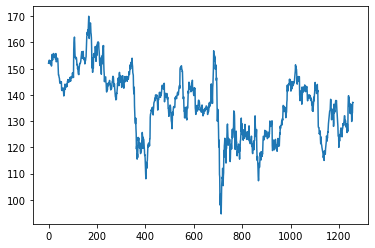

In [55]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [56]:
import numpy as np

In [57]:
df1

0       152.10
1       152.57
2       152.21
3       153.25
4       152.85
         ...  
1253    131.27
1254    133.00
1255    133.10
1256    137.19
1257    137.10
Name: open, Length: 1258, dtype: float64

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [59]:
print(df1)

[[0.76259947]
 [0.76883289]
 [0.76405836]
 ...
 [0.51061008]
 [0.56485411]
 [0.56366048]]


In [60]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [61]:
training_size,test_size

(817, 441)

In [62]:
train_data

array([[0.76259947],
       [0.76883289],
       [0.76405836],
       [0.77785146],
       [0.77254642],
       [0.76061008],
       [0.76167109],
       [0.77188329],
       [0.77546419],
       [0.75888594],
       [0.76127321],
       [0.77519894],
       [0.74801061],
       [0.76127321],
       [0.7903183 ],
       [0.80689655],
       [0.78740053],
       [0.77838196],
       [0.79084881],
       [0.80782493],
       [0.79416446],
       [0.81153846],
       [0.79509284],
       [0.79230769],
       [0.79721485],
       [0.80106101],
       [0.8030504 ],
       [0.80570292],
       [0.79151194],
       [0.78222812],
       [0.81127321],
       [0.77931034],
       [0.76949602],
       [0.77334218],
       [0.77798408],
       [0.78090186],
       [0.78381963],
       [0.78793103],
       [0.78236074],
       [0.76604775],
       [0.73501326],
       [0.70198939],
       [0.70278515],
       [0.69496021],
       [0.68925729],
       [0.68527851],
       [0.66843501],
       [0.665

In [63]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [64]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [65]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [66]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [67]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [69]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 159ms/step - loss: 0.1354 - val_loss: 0.0062
Epoch 2/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0188 - val_loss: 0.0117
Epoch 3/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0140 - val_loss: 0.0058
Epoch 4/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0111 - val_loss: 0.0063
Epoch 5/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0102 - val_loss: 0.0055
Epoch 6/100
12/12 [==============================] - 2s 142ms/step - loss: 0.0093 - val_loss: 0.0047
Epoch 7/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0088 - val_loss: 0.0045
Epoch 8/100
12/12 [==============================] - 2s 142ms/step - loss: 0.0086 - val_loss: 0.0048
Epoch 9/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0080 - val_loss: 0.0043
Epoch 10/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0076 - val_lo

12/12 [==============================] - 1s 118ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 82/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 84/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 85/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 86/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 87/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0014 - val_loss: 9.7263e-04
Epoch 88/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 89/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0015 - val_loss: 9.5865e-04
Epoch 90/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0013 - va

In [72]:
import tensorflow as tf

In [73]:
tf.__version__

'2.2.0'

In [74]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [75]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [76]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

137.92910522935986

In [77]:
math.sqrt(mean_squared_error(ytest,test_predict))

132.66239404294222

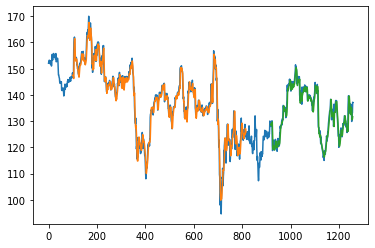

In [78]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [79]:
len(test_data)

441

In [80]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [81]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [82]:
temp_input

[0.4778514588859417,
 0.4907161803713529,
 0.5013262599469499,
 0.5192307692307694,
 0.5225464190981433,
 0.523474801061008,
 0.550397877984085,
 0.5797082228116712,
 0.5782493368700266,
 0.53448275862069,
 0.5287798408488065,
 0.47639257294429727,
 0.5125994694960214,
 0.5212201591511938,
 0.5298408488063664,
 0.5086206896551724,
 0.5079575596816979,
 0.4862068965517241,
 0.49137931034482785,
 0.44283819628647225,
 0.4580901856763926,
 0.5553050397877985,
 0.5180371352785147,
 0.5118037135278515,
 0.523740053050398,
 0.5193633952254642,
 0.5450928381962865,
 0.5623342175066315,
 0.5737400530503982,
 0.5683023872679045,
 0.5653846153846154,
 0.5734748010610082,
 0.5420424403183024,
 0.5212201591511938,
 0.503846153846154,
 0.4779840848806365,
 0.4622015915119364,
 0.4436339522546422,
 0.4023872679045093,
 0.39257294429708245,
 0.3949602122015916,
 0.33687002652519915,
 0.36405835543766596,
 0.36618037135278514,
 0.3722811671087536,
 0.3712201591511939,
 0.4026525198938993,
 0.395225464

In [83]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.55091673]
101
1 day input [0.49071618 0.50132626 0.51923077 0.52254642 0.5234748  0.55039788
 0.57970822 0.57824934 0.53448276 0.52877984 0.47639257 0.51259947
 0.52122016 0.52984085 0.50862069 0.50795756 0.4862069  0.49137931
 0.4428382  0.45809019 0.55530504 0.51803714 0.51180371 0.52374005
 0.5193634  0.54509284 0.56233422 0.57374005 0.56830239 0.56538462
 0.5734748  0.54204244 0.52122016 0.50384615 0.47798408 0.46220159
 0.44363395 0.40238727 0.39257294 0.39496021 0.33687003 0.36405836
 0.36618037 0.37228117 0.37122016 0.40265252 0.39522546 0.42267905
 0.42466844 0.43514589 0.41312997 0.40318302 0.39588859 0.38992042
 0.42307692 0.43103448 0.43474801 0.45623342 0.44960212 0.45729443
 0.44734748 0.46286472 0.48037135 0.49655172 0.49615385 0.47904509
 0.46498674 0.4729443  0.46750663 0.44005305 0.45450928 0.44310345
 0.44230769 0.42201592 0.41167109 0.45530504 0.42440318 0.41750663
 0.53580902 0.57864721 0.59814324 0.57015915 0.58885942 0.54615385
 0.56034483 0.53753316 0.50928382

15 day output [[0.49809054]]
16 day input [0.50795756 0.4862069  0.49137931 0.4428382  0.45809019 0.55530504
 0.51803714 0.51180371 0.52374005 0.5193634  0.54509284 0.56233422
 0.57374005 0.56830239 0.56538462 0.5734748  0.54204244 0.52122016
 0.50384615 0.47798408 0.46220159 0.44363395 0.40238727 0.39257294
 0.39496021 0.33687003 0.36405836 0.36618037 0.37228117 0.37122016
 0.40265252 0.39522546 0.42267905 0.42466844 0.43514589 0.41312997
 0.40318302 0.39588859 0.38992042 0.42307692 0.43103448 0.43474801
 0.45623342 0.44960212 0.45729443 0.44734748 0.46286472 0.48037135
 0.49655172 0.49615385 0.47904509 0.46498674 0.4729443  0.46750663
 0.44005305 0.45450928 0.44310345 0.44230769 0.42201592 0.41167109
 0.45530504 0.42440318 0.41750663 0.53580902 0.57864721 0.59814324
 0.57015915 0.58885942 0.54615385 0.56034483 0.53753316 0.50928382
 0.50928382 0.50755968 0.55517241 0.54204244 0.52798408 0.53580902
 0.46763926 0.48633952 0.50928382 0.51061008 0.56485411 0.56366048
 0.55091673 0.555665

In [84]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [85]:
import matplotlib.pyplot as plt

In [86]:
len(df1)

1258

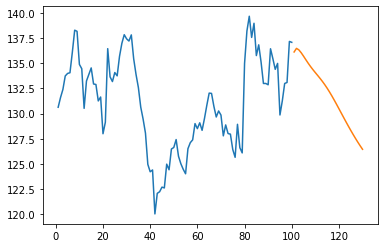

In [87]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

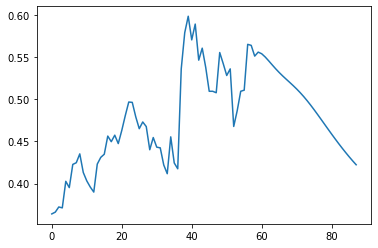

In [88]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [89]:
df3=scaler.inverse_transform(df3).tolist()

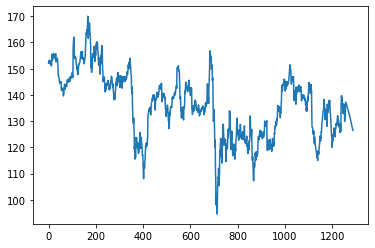

In [90]:
plt.plot(df3)